In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img= cv2.imread("tri.jpg", 1)

In [3]:
import cv2
import numpy as np

def gaussian_blur_canny(image, kernel_size=5, canny_low=50, canny_high=150):
    """
    Apply Gaussian blur to grayscale image then perform Canny edge detection
    
    Args:
        image: Input image (color or grayscale)
        kernel_size: Size of Gaussian blur kernel (odd number, e.g., 3, 5, 7, 9)
        canny_low: Lower threshold for Canny edge detection
        canny_high: Upper threshold for Canny edge detection
    
    Returns:
        numpy.ndarray: Final edge-detected image
    """
    
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    
    # Apply Canny edge detection
    edges = cv2.Canny(blurred, canny_low, canny_high)
    
    return edges

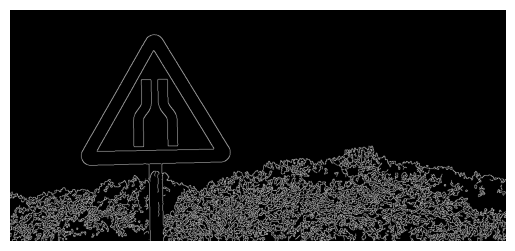

In [4]:
canny=gaussian_blur_canny(img)
plt.imshow(canny,cmap='gray')
plt.axis('off')
plt.show()

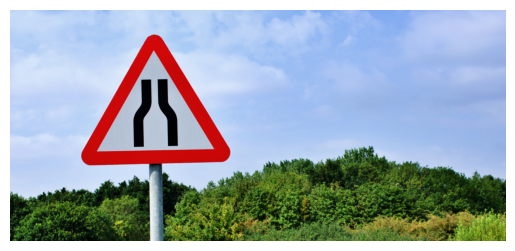

In [5]:
cv2.imwrite('tsr.jpg', img)
    
    # Or display it
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [6]:
import cv2
import numpy as np

def extract_shape_boundaries(image, kernel_size=5, canny_low=50, canny_high=150, min_area=100):
    """
    Extract only the boundaries of shapes (diamond, circle, octagon, pentagon, etc.)
    
    Args:
        image: Input image (color or grayscale)
        kernel_size: Size of Gaussian blur kernel (odd number, e.g., 3, 5, 7, 9)
        canny_low: Lower threshold for Canny edge detection
        canny_high: Upper threshold for Canny edge detection
        min_area: Minimum area to filter small contours/noise
    
    Returns:
        numpy.ndarray: Image with only shape boundaries drawn
    """
    
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    
    # Apply Canny edge detection
    edges = cv2.Canny(blurred, canny_low, canny_high)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create blank image for drawing clean boundaries
    result = np.zeros_like(gray)
    
    # Filter and draw only significant shape boundaries
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:  # Filter out small noise
            # Draw the contour boundary
            cv2.drawContours(result, [contour], -1, 255, 1)
    
    return result

# Usage example:
# image = cv2.imread('your_image.jpg')
# result = extract_shape_boundaries(image, min_area=500)  # Adjust min_area as needed
# cv2.imshow('Shape Boundaries', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

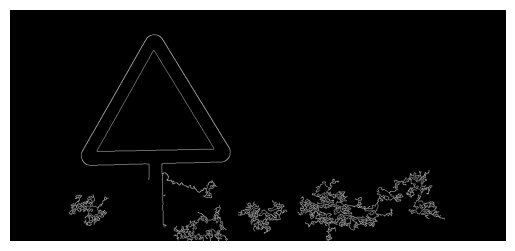

In [7]:
bound=extract_shape_boundaries(img, min_area=500)
plt.imshow(bound,cmap='gray')
plt.axis('off')
plt.show()

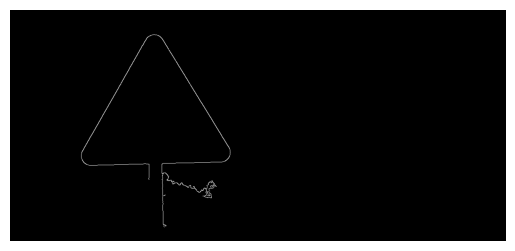

In [8]:
import cv2
import numpy as np

def extract_shape_boundaries__2(image, kernel_size=5, canny_low=50, canny_high=150, min_area=100):
    """
    Extract only the boundaries of the largest shape
    
    Args:
        image: Input image (color or grayscale)
        kernel_size: Size of Gaussian blur kernel (odd number, e.g., 3, 5, 7, 9)
        canny_low: Lower threshold for Canny edge detection
        canny_high: Upper threshold for Canny edge detection
        min_area: Minimum area to filter small contours/noise
    
    Returns:
        numpy.ndarray: Image with only the largest shape boundary drawn
    """
    
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    
    # Apply Canny edge detection
    edges = cv2.Canny(blurred, canny_low, canny_high)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create blank image for drawing clean boundaries
    result = np.zeros_like(gray)
    
    if not contours:
        return result
    
    # Filter contours by minimum area
    valid_contours = [c for c in contours if cv2.contourArea(c) > min_area]
    
    if not valid_contours:
        return result
    
    # Select the largest contour by bounding box area (to get outer shape)
    largest_contour = max(valid_contours, key=lambda c: cv2.boundingRect(c)[2] * cv2.boundingRect(c)[3])
    
    # Draw only the largest contour
    cv2.drawContours(result, [largest_contour], -1, 255, 1)
    
    return result

bound2=extract_shape_boundaries__2(img, min_area=500)
plt.imshow(bound2,cmap='gray')
plt.axis('off')
plt.show()



In [9]:
def extract_shape_boundaries_adaptive(image, kernel_size=5, canny_low=50, canny_high=150, min_area_ratio=0.01):
    """
    Extract shape boundaries with adaptive area filtering based on image size
    
    Args:
        image: Input image
        min_area_ratio: Minimum area as percentage of total image area (0.01 = 1%)
    
    Returns:
        numpy.ndarray: Image with only shape boundaries
    """
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Calculate adaptive min_area based on image size
    total_pixels = gray.shape[0] * gray.shape[1]
    min_area = int(total_pixels * min_area_ratio)
    
    print(f"Image size: {gray.shape[0]}x{gray.shape[1]} = {total_pixels} pixels")
    print(f"Min area threshold: {min_area} pixels ({min_area_ratio*100}% of image)")
    
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    
    # Apply Canny edge detection
    edges = cv2.Canny(blurred, canny_low, canny_high)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create blank image for drawing clean boundaries
    result = np.zeros_like(gray)
    
    # Filter and draw only significant shape boundaries
    shapes_found = 0
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:  # Adaptive filtering
            cv2.drawContours(result, [contour], -1, 255, 1)
            shapes_found += 1
    
    print(f"Found {shapes_found} significant shapes")
    
    return result

def extract_shape_boundaries_filled(image, kernel_size=5, canny_low=50, canny_high=150, min_area_ratio=0.01):
    """
    Extract shape boundaries and fill gaps using morphological operations
    
    Returns:
        numpy.ndarray: Image with filled, continuous boundaries
    """
    # Get basic boundaries first
    result1= extract_shape_boundaries_adaptive(image, kernel_size, canny_low, canny_high, min_area_ratio)

    plt.imshow(result1,cmap='gray')
    plt.axis('off')
    plt.show()
    
    # Fill gaps using morphological closing
    kernel = np.ones((3, 3), np.uint8)
    
    # Close small gaps
    result = cv2.morphologyEx(result1, cv2.MORPH_CLOSE, kernel, iterations=1)
    
    # Optional: Make lines slightly thicker
   # result = cv2.dilate(result, kernel, iterations=1)
    
    return result

Image size: 560x1200 = 672000 pixels
Min area threshold: 6720 pixels (1.0% of image)
Found 1 significant shapes


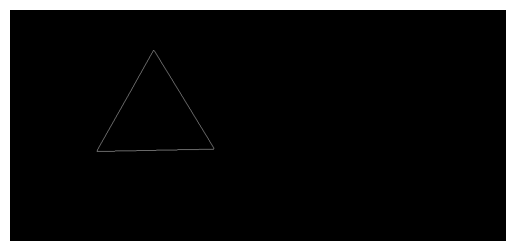

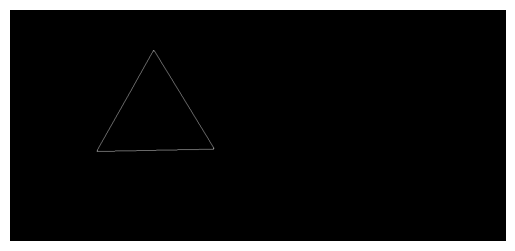

In [10]:
Filled_bound=extract_shape_boundaries_filled(img)
plt.imshow(Filled_bound,cmap='gray')
plt.axis('off')
plt.show()

In [11]:
# def extract_inner_region(original_image, boundary_image):
#     """
#     Use the boundary to extract only the inner portion of the original image
    
#     Args:
#         original_image: Your original color/grayscale image
#         boundary_image: The boundary image from extract_shape_boundaries_filled()
    
#     Returns:
#         numpy.ndarray: Original image with only the inner regions visible
#     """
#     # Create a mask by filling the boundaries
#     mask = boundary_image.copy()
    
#     # Find contours from the boundary
#     contours, _ = cv2.findContours(boundary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     # Fill the interior of each contour to create a solid mask
#     for contour in contours:
#         cv2.fillPoly(mask, [contour], 255)
    
#     # Apply the mask to the original image
#     if len(original_image.shape) == 3:  # Color image
#         # Create 3-channel mask for color image
#         mask_3ch = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
#         result = cv2.bitwise_and(original_image, mask_3ch)
#     else:  # Grayscale image
#         result = cv2.bitwise_and(original_image, mask)
    
#     return result, mask

# def extract_inner_region_cropped(original_image, boundary_image):
#     """
#     Extract inner region and crop to the bounding box (removes black background)
    
#     Returns:
#         numpy.ndarray: Cropped image showing only the shape interior
#     """
#     # Get the inner region first
#     inner_image, mask = extract_inner_region(original_image, boundary_image)
    
#     # Find the bounding box of the shape
#     contours, _ = cv2.findContours(boundary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     if len(contours) > 0:
#         # Get the largest contour (main shape)
#         largest_contour = max(contours, key=cv2.contourArea)
        
#         # Get bounding rectangle
#         x, y, w, h = cv2.boundingRect(largest_contour)
        
#         # Crop to the bounding box
#         cropped = inner_image[y:y+h, x:x+w]
        
#         return cropped, (x, y, w, h)
    
#     return inner_image, None

In [12]:
def extract_inner_region(original_image, boundary_image):
    """
    Use the boundary to extract only the inner portion of the original image
    
    Args:
        original_image: Your original color/grayscale image
        boundary_image: The boundary image from extract_shape_boundaries_filled()
    
    Returns:
        numpy.ndarray: Original image with only the inner regions visible
    """
    # Create a mask by filling the boundaries
    mask = boundary_image.copy()
    
    # Find contours from the boundary
    contours, _ = cv2.findContours(boundary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Fill the interior of each contour to create a solid mask
    for contour in contours:
        cv2.fillPoly(mask, [contour], 255)
    
    # Normalize mask to 0-1 range for proper masking
    mask_normalized = mask.astype(np.float32) / 255.0
    
    # Apply the mask to preserve original colors
    if len(original_image.shape) == 3:  # Color image
        # Apply mask to each channel separately
        result = original_image.copy().astype(np.float32)
        for i in range(3):
            result[:, :, i] = result[:, :, i] * mask_normalized
        result = result.astype(np.uint8)
    else:  # Grayscale image
        result = (original_image.astype(np.float32) * mask_normalized).astype(np.uint8)
    
    return result, mask

def extract_inner_region_cropped(original_image, boundary_image):
    """
    Extract inner region and crop to the bounding box (removes black background)
    
    Returns:
        numpy.ndarray: Cropped image showing only the shape interior
    """
    # Get the inner region first
    inner_image, mask = extract_inner_region(original_image, boundary_image)
    
    # Find the bounding box of the shape
    contours, _ = cv2.findContours(boundary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) > 0:
        # Get the largest contour (main shape)
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Get bounding rectangle
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Crop to the bounding box
        cropped = inner_image[y:y+h, x:x+w]
        
        return cropped, (x, y, w, h)
    
    return inner_image, None

In [13]:
inner_region, mask = extract_inner_region(img, Filled_bound)

cropped_inner, bbox = extract_inner_region_cropped(img, Filled_bound)

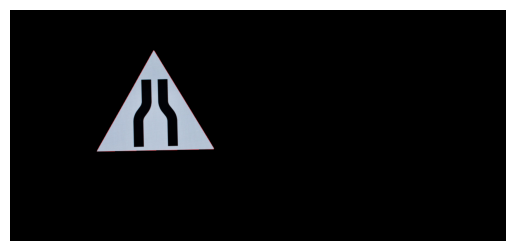

In [14]:
inner_rgb = cv2.cvtColor(inner_region, cv2.COLOR_BGR2RGB)
plt.imshow(inner_rgb,cmap='gray')
plt.axis('off')
plt.show()

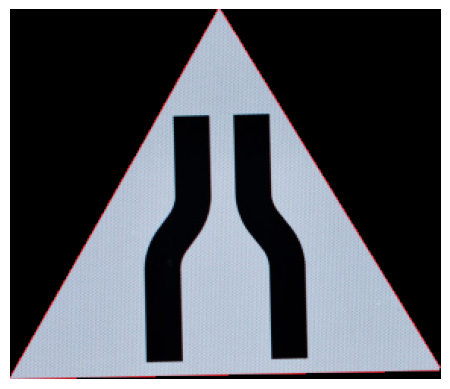

In [15]:
cropped_rgb = cv2.cvtColor(cropped_inner, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_rgb,cmap='gray')
plt.axis('off')
plt.show()

In [16]:
def analyze_colors(image):
    """
    Analyze only significant road sign colors (no gray/white background colors)
    """
    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define HSV ranges for ONLY significant road sign colors
    color_ranges = {
        'red': [
            (np.array([0, 100, 100]), np.array([10, 255, 255])),    # Stop, warning, prohibition signs
            (np.array([170, 100, 100]), np.array([180, 255, 255]))  # Stop, warning, prohibition signs
        ],
        'blue': [(np.array([100, 100, 100]), np.array([130, 255, 255]))],  # Mandatory/information signs
        'yellow': [(np.array([20, 100, 100]), np.array([30, 255, 255]))],   # Warning signs
        'green': [(np.array([40, 100, 100]), np.array([80, 255, 255]))],    # Direction/guide signs
        'orange': [(np.array([10, 100, 100]), np.array([20, 255, 255]))],   # Construction/temporary signs
        'brown': [(np.array([8, 100, 50]), np.array([15, 255, 150]))]       # Tourist/recreational signs
    }
    
    color_pixels = {}
    
    # Only count non-black pixels (ignore background)
    non_black_mask = cv2.inRange(hsv, np.array([0, 0, 1]), np.array([180, 255, 255]))
    total_pixels = cv2.countNonZero(non_black_mask)
    
    if total_pixels == 0:
        return "unknown", {}
    
    for color_name, ranges in color_ranges.items():
        mask = np.zeros(hsv.shape[:2], dtype=np.uint8)
        
        for lower, upper in ranges:
            color_mask = cv2.inRange(hsv, lower, upper)
            mask = cv2.bitwise_or(mask, color_mask)
        
        # Only count pixels that are also non-black
        final_mask = cv2.bitwise_and(mask, non_black_mask)
        pixel_count = cv2.countNonZero(final_mask)
        color_pixels[color_name] = pixel_count / total_pixels if total_pixels > 0 else 0
    
    # Find dominant significant color (ignore colors with <2% presence)
    significant_colors = {k: v for k, v in color_pixels.items() if v > 0.02}
    
    if significant_colors:
        dominant_color = max(significant_colors, key=significant_colors.get)
        return dominant_color, significant_colors
    else:
        return "no_significant_color", color_pixels

In [17]:
dominant_color, color_percentages = analyze_colors(cropped_inner)
    
    # Print results
print(f"Dominant color: {dominant_color}")
print("Significant color percentages:")
for color, percentage in sorted(color_percentages.items(), key=lambda x: x[1], reverse=True):
    if percentage > 0.01:  # Only show colors with >1% presence
        print(f"  {color}: {percentage*100:.1f}%")
    

Dominant color: no_significant_color
Significant color percentages:
  red: 1.7%


In [18]:
def fill_holes_conditional_dilation(boundary_image, max_hole_size=1000):
    """
    Fill only small holes using conditional dilation, preserve large interior spaces
    
    Args:
        boundary_image: Binary image with boundaries
        max_hole_size: Maximum area of holes to fill (pixels)
    """
    # Find all contours (including holes)
    contours, hierarchy = cv2.findContours(boundary_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a copy of the original image
    filled = boundary_image.copy()
    
    if hierarchy is not None:
        # Process each contour
        for i, contour in enumerate(contours):
            # Check if this is a hole (inner contour)
            if hierarchy[0][i][3] != -1:  # Has a parent (it's a hole)
                area = cv2.contourArea(contour)
                
                # Only fill small holes, preserve large interior spaces
                if 0 < area < max_hole_size:
                    cv2.fillPoly(filled, [contour], 255)
    
    return filled

def fill_shape_interior(boundary_image):
    """
    Fill the interior of shapes completely (for shape analysis)
    """
    # Find external contours only
    contours, _ = cv2.findContours(boundary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create filled version
    filled = np.zeros_like(boundary_image)
    
    # Fill each external contour
    for contour in contours:
        cv2.fillPoly(filled, [contour], 255)
    
    return filled

def max_arm(image):
    """Extract major and minor axis lengths from fitted ellipse"""
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return 0, 0
        
    cnt = max(contours, key=cv2.contourArea)
    
    if len(cnt) >= 5:
        (x, y), (MA, ma), angle = cv2.fitEllipse(cnt)
        return MA, ma
    else:
        return 0, 0

def des(image):
    """Calculate shape descriptors"""
    import math
    
    kernel = np.ones((3, 3), np.uint8)
    eroded = cv2.erode(image, kernel, iterations=1)
    border = cv2.subtract(image, eroded)
    
    q, w = max_arm(image)
    mx_arm = max(q, w)
    min_arm = min(q, w)
    
    area = np.count_nonzero(image)
    perimeter = np.count_nonzero(border)
    
    if perimeter == 0 or mx_arm == 0:
        return 0, 0, 0, 0, 0, 0, 0
    
    form_factor = (4 * np.pi * area) / (perimeter**2)
    compactness = (perimeter**2) / area
    
    if mx_arm > 0:
        eccentricity = math.sqrt(1 - (min_arm**2 / mx_arm**2))
    else:
        eccentricity = 0
        
    roundness = (4 * area) / (np.pi * mx_arm**2)
    
    return mx_arm, min_arm, area, perimeter, compactness, form_factor, eccentricity, roundness

def classify_shape(image):
    """
    Classify shape by comparing descriptors with ideal shapes
    """
    import math
    
    # Fill holes first
    filled_image = fill_holes_conditional_dilation(image)
    
    # Calculate descriptors
    mx_arm, min_arm, area, perimeter, compactness, form_factor, eccentricity, roundness = des(filled_image)
    
    if area == 0:
        return "unknown", None
    
    calculated_features = [form_factor, compactness, eccentricity, roundness]
    
    # Corrected ideal shape features [form_factor, compactness, eccentricity, roundness]
    # Based on theoretical perfect shapes
    ideal_shapes = {
        'circle': [1.0, 12.566, 0.0, 1.0],           # Perfect circle
        'square': [0.785, 16.0, 0.0, 0.785],         # Perfect square  
        'rectangle': [0.5, 24.0, 0.866, 0.5],        # Rectangle (2:1 ratio)
        'triangle': [0.544, 20.78, 0.577, 0.544],    # Equilateral triangle
        'pentagon': [0.87, 14.45, 0.0, 0.87],        # Regular pentagon
        'hexagon': [0.906, 13.86, 0.0, 0.906],       # Regular hexagon
        'octagon': [0.954, 13.26, 0.0, 0.954]        # Regular octagon
    }
    
    def distance(x, y):
        """Calculate weighted Euclidean distance between two feature vectors"""
        total = 0
        weights = [1.0, 0.1, 1.0, 1.0]  # Weight compactness less (it varies more)
        for i in range(len(x)):
            if len(y) > i:
                dif = (x[i] - y[i]) * weights[i]
                total += dif * dif
        return math.sqrt(total)
    
    # Find closest match
    min_distance = float('inf')
    best_shape = "unknown"
    distances = {}
    
    for shape_name, ideal_features in ideal_shapes.items():
        dist = distance(calculated_features, ideal_features)
        distances[shape_name] = dist
        if dist < min_distance:
            min_distance = dist
            best_shape = shape_name
    
    # Additional check for circle detection
    # A circle should have form_factor > 0.9 and eccentricity < 0.1
    if form_factor > 0.9 and eccentricity < 0.1:
        best_shape = "circle"
    
    return best_shape, {
        'features': calculated_features,
        'distances': distances,
        'descriptors': {
            'form_factor': form_factor,
            'compactness': compactness, 
            'eccentricity': eccentricity,
            'roundness': roundness,
            'area': area,
            'perimeter': perimeter
        }
    }

In [19]:
filled_area=fill_holes_conditional_dilation(bound)




# Suppose your function is named detect_shapes()
best_shape, result = classify_shape(filled_area)

print("Best Shape:", best_shape)
print("\nFeatures:", result['features'])
print("\nDistances:", result['distances'])

print("\nDescriptors:")
for key, value in result['descriptors'].items():
    print(f"  {key}: {value}")


Best Shape: rectangle

Features: [0.0013960392069369608, 9001.445340443519, 0.9806458896350143, 0.003079934636028519]

Distances: {'circle': 898.8895764755374, 'square': 898.5457510675227, 'rectangle': 897.7448173538245, 'triangle': 898.0669515765595, 'pentagon': 898.7009069657915, 'hexagon': 898.7599778343958, 'octagon': 898.8200768292147}

Descriptors:
  form_factor: 0.0013960392069369608
  compactness: 9001.445340443519
  eccentricity: 0.9806458896350143
  roundness: 0.003079934636028519
  area: 15377
  perimeter: 11765


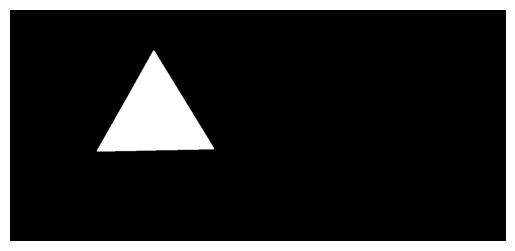

In [20]:
Filled_area=fill_holes_conditional_dilation(Filled_bound)
xyz=fill_shape_interior(Filled_area)

plt.imshow(xyz,cmap='gray')
plt.axis('off')
plt.show()

In [21]:
def classify_shape_improved(image):
    """
    Improved shape classification using contour analysis and multiple methods
    """
    # For shape analysis, we need filled shapes
    filled_image = fill_shape_interior(image)
    
    # Find contours
    contours, _ = cv2.findContours(filled_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return "unknown", None
    
    # Get the largest contour
    cnt = max(contours, key=cv2.contourArea)
    
    if len(cnt) < 5:
        return "unknown", None
    
    # Method 1: Contour approximation
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    vertices = len(approx)
    
    # Method 2: Aspect ratio and extent
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    area = cv2.contourArea(cnt)
    rect_area = w * h
    extent = float(area) / rect_area
    
    # Method 3: Solidity (convex hull)
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = float(area) / hull_area if hull_area > 0 else 0
    
    # Method 4: Circularity (form factor)
    perimeter = cv2.arcLength(cnt, True)
    circularity = 4 * np.pi * area / (perimeter**2) if perimeter > 0 else 0
    
    # Method 5: Eccentricity from fitted ellipse
    if len(cnt) >= 5:
        (x_center, y_center), (MA, ma), angle = cv2.fitEllipse(cnt)
        # Ensure MA is the major axis and ma is the minor axis
        major_axis = max(MA, ma)
        minor_axis = min(MA, ma)
        
        if major_axis > 0:
            ratio = minor_axis**2 / major_axis**2
            # Ensure ratio is between 0 and 1 to avoid sqrt of negative number
            ratio = max(0, min(1, ratio))
            eccentricity = np.sqrt(1 - ratio)
        else:
            eccentricity = 0
    else:
        eccentricity = 0
    
    
    # Classification rules (more robust)
    shape_name = "unknown"
    confidence = 0
    
    # Circle detection (most reliable features)
    if (circularity > 0.7 and eccentricity < 0.3 and 
        solidity > 0.9 and 0.8 < aspect_ratio < 1.2):
        shape_name = "circle"
        confidence = circularity
    
    # Square detection  
    elif (vertices == 4 and 0.9 < aspect_ratio < 1.1 and 
          extent > 0.8 and solidity > 0.9):
        shape_name = "square"
        confidence = extent * solidity
    
    # Rectangle detection
    elif (vertices == 4 and (aspect_ratio < 0.9 or aspect_ratio > 1.1) and
          extent > 0.7 and solidity > 0.85):
        shape_name = "rectangle" 
        confidence = extent * solidity
    
    # Triangle detection
    elif vertices == 3 and solidity > 0.8:
        shape_name = "triangle"
        confidence = solidity
    
    # Pentagon detection
    elif vertices == 5 and solidity > 0.85:
        shape_name = "pentagon"
        confidence = solidity
    
    # Hexagon detection  
    elif vertices == 6 and solidity > 0.85:
        shape_name = "hexagon"
        confidence = solidity
    
    # Octagon detection
    elif vertices == 8 and solidity > 0.85:
        shape_name = "octagon"
        confidence = solidity
    
    # High vertex count might be circle
    elif vertices > 10 and circularity > 0.6 and eccentricity < 0.4:
        shape_name = "circle"
        confidence = circularity
    
    return shape_name, {
        'confidence': confidence,
        'vertices': vertices,
        'aspect_ratio': aspect_ratio,
        'extent': extent,
        'solidity': solidity, 
        'circularity': circularity,
        'eccentricity': eccentricity,
        'area': area,
        'perimeter': perimeter
    }


In [22]:
# Suppose your function is named detect_shape()
shape_name, result = classify_shape_improved(Filled_area)

print("Detected Shape:", shape_name)

print("\nProperties:")
for key, value in result.items():
    print(f"  {key}: {value}")


Detected Shape: triangle

Properties:
  confidence: 0.9890696310285134
  vertices: 3
  aspect_ratio: 1.1639344262295082
  extent: 0.4988238859385823
  solidity: 0.9890696310285134
  circularity: 0.5560058485071881
  eccentricity: 0.9806458896350143
  area: 34566.5
  perimeter: 883.8792854547501
